In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the file

nba_df = pd.read_excel('/Users/keyan/Downloads/Draft_Standings_Merged_Database.xlsx')

nba_df.head()

,Pick,Draft Year,Team (Full Name),Team And Draft Year,Team Abbr.,Player,College,Years Played,Games Played,Minutes Played,...,NRtg,Win%,Pythagorean Win%,MOV Percentile,SRS Percentile,ORTG Percentile,DRTG Percentile,Net Rating Percentile,Win% Percentile,Pythagorean Win% Percentile
0,1,1985,New York Knicks,New York Knicks: 1985,NYK,Patrick Ewing,Georgetown,17,1183,40594,...,-4.7,29.268293,35.365854,17.8,19.5,22.7,18.2,18.3,10.6,18.0
1,2,1985,Indiana Pacers,Indiana Pacers: 1985,IND,Wayman Tisdale,Oklahoma,12,840,23868,...,-5.9,26.829268,31.707317,11.4,13.0,0.0,41.0,13.1,8.0,12.9
2,3,1985,Los Angeles Clippers,Los Angeles Clippers: 1985,LAC,Benoit Benjamin,Creighton,15,807,21911,...,-4.5,37.804878,36.585366,18.3,17.5,27.2,9.1,19.3,23.5,20.5
3,4,1985,Seattle SuperSonics,Seattle SuperSonics: 1985,SEA,Xavier McDaniel,Wichita State,12,870,25201,...,-5.4,37.804878,32.926829,14.3,13.1,4.5,45.5,15.6,23.5,14.7
4,5,1985,Atlanta Hawks,Atlanta Hawks: 1985,ATL,Jon Koncak,SMU,11,784,16409,...,-1.4,41.463415,45.121951,36.4,38.3,31.8,59.1,37.0,29.8,35.4


In [5]:
#Analyzing The Effect of Major Controls (Team Quality, and Draft Pick Related) on a player's percentile ranking in terms of 
#VORP (VORP is arguably the best single number metric that is available for all players throughout the 1985-2020 timespan)

#The use of percentile metrics for player quality is a worse quality method for analysis because it underweighs the 
#contributions of superstar players by making their contributions no more important than that of a player who played
#fewer seasons, games, and minutes.


nba_df['Draft_Pick'] = nba_df['Pick']

nba_df['InvPick'] = 1 / nba_df['Pick']

nba_df['LogPick'] = np.log(nba_df['Pick'])
nba_df['Team_Quality_SRS'] = nba_df['SRS Percentile']
nba_df['Team_Quality_Net_Rating'] = nba_df['Net Rating Percentile']
nba_df['Team_Quality_MOV'] = nba_df['MOV Percentile']
nba_df['Team_Quality_Offense'] = nba_df['ORTG Percentile']
nba_df['Team_Quality_Defense'] = nba_df['DRTG Percentile']
nba_df['Team_Quality_WP'] = nba_df['Win% Percentile']
nba_df['Team_Quality_Pyth_WP'] = nba_df['Pythagorean Win% Percentile']
nba_df['Player_Quality_VORP_Percentile'] = nba_df['VORP Percentile']

y=nba_df['Player_Quality_VORP_Percentile']
x=sm.add_constant(nba_df[['LogPick', 'SRS Percentile', 'Net Rating Percentile', 'MOV Percentile', 'ORTG Percentile', 'DRTG Percentile', 'Win% Percentile', 'Pythagorean Win% Percentile']])

final_VORP_Percentile_draft_model = sm.OLS(y, x).fit()

print(final_VORP_Percentile_draft_model.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Player_Quality_VORP_Percentile   R-squared:                       0.122
Model:                                        OLS   Adj. R-squared:                  0.118
Method:                             Least Squares   F-statistic:                     31.21
Date:                            Wed, 06 Aug 2025   Prob (F-statistic):           3.84e-46
Time:                                    12:37:03   Log-Likelihood:                -8556.3
No. Observations:                            1808   AIC:                         1.713e+04
Df Residuals:                                1799   BIC:                         1.718e+04
Df Model:                                       8                                         
Covariance Type:                        nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0

In [7]:
#Analyzing The Effect of Major Controls (Team Quality, and Draft Pick Related) on a player's percentile ranking in terms of 
#WS (WS as a Percentile creates the best model for this, as it has the highest R^2, and adjusted R^2)


nba_df['Draft_Pick'] = nba_df['Pick']

nba_df['InvPick'] = 1 / nba_df['Pick']

nba_df['LogPick'] = np.log(nba_df['Pick'])
nba_df['Team_Quality_SRS'] = nba_df['SRS Percentile']
nba_df['Team_Quality_Net_Rating'] = nba_df['Net Rating Percentile']
nba_df['Team_Quality_MOV'] = nba_df['MOV Percentile']
nba_df['Team_Quality_Offense'] = nba_df['ORTG Percentile']
nba_df['Team_Quality_Defense'] = nba_df['DRTG Percentile']
nba_df['Team_Quality_WP'] = nba_df['Win% Percentile']
nba_df['Team_Quality_Pyth_WP'] = nba_df['Pythagorean Win% Percentile']
nba_df['Player_Quality_WS_Percentile'] = nba_df['WS Percentile']

y=nba_df['Player_Quality_WS_Percentile']
x=sm.add_constant(nba_df[['LogPick', 'SRS Percentile', 'Net Rating Percentile', 'MOV Percentile', 'ORTG Percentile', 'DRTG Percentile', 'Win% Percentile', 'Pythagorean Win% Percentile']])

final_WS_Percentile_draft_model = sm.OLS(y, x).fit()

print(final_WS_Percentile_draft_model.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Player_Quality_WS_Percentile   R-squared:                       0.239
Model:                                      OLS   Adj. R-squared:                  0.236
Method:                           Least Squares   F-statistic:                     70.63
Date:                          Wed, 06 Aug 2025   Prob (F-statistic):          3.37e-101
Time:                                  12:37:10   Log-Likelihood:                -8429.9
No. Observations:                          1808   AIC:                         1.688e+04
Df Residuals:                              1799   BIC:                         1.693e+04
Df Model:                                     8                                         
Covariance Type:                      nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------

In [324]:
#Analyzing The Effect of Major Controls (Team Quality, and Draft Pick Related) on a player's career output in terms of 
#total WS (WS as a total creates a better model than total VORP)


#nba_df['WS_for_log'] = nba_df['Player_Quality_Raw_WS'].apply(lambda x: x if x > 0 else 0.1)
#nba_df['log_WS'] = np.log(nba_df['WS_for_log'])

nba_df['Draft_Pick'] = nba_df['Pick']

nba_df['InvPick'] = 1 / nba_df['Pick']

nba_df['LogPick'] = np.log(nba_df['Pick'])
nba_df['Team_Quality_SRS'] = nba_df['SRS Percentile']
nba_df['Team_Quality_Net_Rating'] = nba_df['Net Rating Percentile']
nba_df['Team_Quality_MOV'] = nba_df['MOV Percentile']
nba_df['Team_Quality_Offense'] = nba_df['ORTG Percentile']
nba_df['Team_Quality_Defense'] = nba_df['DRTG Percentile']
nba_df['Team_Quality_WP'] = nba_df['Win% Percentile']
nba_df['Team_Quality_Pyth_WP'] = nba_df['Pythagorean Win% Percentile']
nba_df['Player_Quality_Raw_WS'] = nba_df['WS']




y=nba_df['Player_Quality_Raw_WS']
x=sm.add_constant(nba_df[['LogPick', 'SRS Percentile', 'Net Rating Percentile', 'MOV Percentile', 'ORTG Percentile', 'DRTG Percentile', 'Win% Percentile', 'Pythagorean Win% Percentile']])

final_WS_draft_model = sm.OLS(y, x).fit()

print(final_WS_draft_model.summary())

                              OLS Regression Results                             
Dep. Variable:     Player_Quality_Raw_WS   R-squared:                       0.226
Model:                               OLS   Adj. R-squared:                  0.223
Method:                    Least Squares   F-statistic:                     65.83
Date:                   Wed, 16 Jul 2025   Prob (F-statistic):           7.17e-95
Time:                           20:41:47   Log-Likelihood:                -8519.2
No. Observations:                   1808   AIC:                         1.706e+04
Df Residuals:                       1799   BIC:                         1.711e+04
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [294]:
#Analyzing The Effect of Major Controls (Team Quality, and Draft Pick Related) on a player's career output in terms of 
#total VORP (As with other cases, VORP fails to create a particularly strong model)

nba_df['Draft_Pick'] = nba_df['Pick']

nba_df['InvPick'] = 1 / nba_df['Pick']

nba_df['LogPick'] = np.log(nba_df['Pick'])
nba_df['Team_Quality_SRS'] = nba_df['SRS Percentile']
nba_df['Team_Quality_Net_Rating'] = nba_df['Net Rating Percentile']
nba_df['Team_Quality_MOV'] = nba_df['MOV Percentile']
nba_df['Team_Quality_Offense'] = nba_df['ORTG Percentile']
nba_df['Team_Quality_Defense'] = nba_df['DRTG Percentile']
nba_df['Team_Quality_WP'] = nba_df['Win% Percentile']
nba_df['Team_Quality_Pyth_WP'] = nba_df['Pythagorean Win% Percentile']
nba_df['Player_Quality_Raw_VORP'] = nba_df['VORP']

y=nba_df['Player_Quality_Raw_VORP']
x=sm.add_constant(nba_df[['LogPick', 'SRS Percentile', 'Net Rating Percentile', 'MOV Percentile', 'ORTG Percentile', 'DRTG Percentile', 'Win% Percentile', 'Pythagorean Win% Percentile']])

final_VORP_draft_model = sm.OLS(y, x).fit()

print(final_VORP_draft_model.summary())

                               OLS Regression Results                              
Dep. Variable:     Player_Quality_Raw_VORP   R-squared:                       0.174
Model:                                 OLS   Adj. R-squared:                  0.170
Method:                      Least Squares   F-statistic:                     47.30
Date:                     Wed, 16 Jul 2025   Prob (F-statistic):           1.71e-69
Time:                             20:30:13   Log-Likelihood:                -6988.8
No. Observations:                     1808   AIC:                         1.400e+04
Df Residuals:                         1799   BIC:                         1.405e+04
Df Model:                                8                                         
Covariance Type:                 nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [302]:
nba_df['Draft_Pick'] = nba_df['Pick']

nba_df['LogPick'] = np.log(nba_df['Pick'])
nba_df['Team_Quality_SRS'] = nba_df['SRS Percentile']
nba_df['Team_Quality_Net_Rating'] = nba_df['Net Rating Percentile']
nba_df['Team_Quality_MOV'] = nba_df['MOV Percentile']
nba_df['Team_Quality_Offense'] = nba_df['ORTG Percentile']
nba_df['Team_Quality_Defense'] = nba_df['DRTG Percentile']
nba_df['Team_Quality_WP'] = nba_df['Win% Percentile']
nba_df['Team_Quality_Pyth_WP'] = nba_df['Pythagorean Win% Percentile']
nba_df['Player_Quality_VORP_Percentile'] = nba_df['VORP Percentile']

y=nba_df['Player_Quality_VORP_Percentile']
x=sm.add_constant(nba_df[['LogPick', 'Net Rating Percentile', 'Win% Percentile']])

final_VORP_Percentile_draft_model_best_adj_r_sq = sm.OLS(y, x).fit()

print(final_VORP_Percentile_draft_model_best_adj_r_sq.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Player_Quality_VORP_Percentile   R-squared:                       0.121
Model:                                        OLS   Adj. R-squared:                  0.120
Method:                             Least Squares   F-statistic:                     82.75
Date:                            Wed, 16 Jul 2025   Prob (F-statistic):           3.69e-50
Time:                                    20:31:08   Log-Likelihood:                -8557.2
No. Observations:                            1808   AIC:                         1.712e+04
Df Residuals:                                1804   BIC:                         1.714e+04
Df Model:                                       3                                         
Covariance Type:                        nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]


In [300]:
nba_df['Draft_Pick'] = nba_df['Pick']

nba_df['LogPick'] = np.log(nba_df['Pick'])

nba_df['Team_Quality_SRS'] = nba_df['SRS Percentile']
nba_df['Team_Quality_Net_Rating'] = nba_df['Net Rating Percentile']
nba_df['Team_Quality_MOV'] = nba_df['MOV Percentile']
nba_df['Team_Quality_Offense'] = nba_df['ORTG Percentile']
nba_df['Team_Quality_Defense'] = nba_df['DRTG Percentile']
nba_df['Team_Quality_WP'] = nba_df['Win% Percentile']
nba_df['Team_Quality_Pyth_WP'] = nba_df['Pythagorean Win% Percentile']
nba_df['Player_Quality_WS_Percentile'] = nba_df['WS Percentile']

y=nba_df['Player_Quality_WS_Percentile']
x=sm.add_constant(nba_df[['LogPick', 'Net Rating Percentile', 'Win% Percentile', 'Pythagorean Win% Percentile']])

final_WS_Percentile_draft_model_best_adj_r_sq = sm.OLS(y, x).fit()

print(final_WS_Percentile_draft_model_best_adj_r_sq.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Player_Quality_WS_Percentile   R-squared:                       0.239
Model:                                      OLS   Adj. R-squared:                  0.237
Method:                           Least Squares   F-statistic:                     141.3
Date:                          Wed, 16 Jul 2025   Prob (F-statistic):          3.89e-105
Time:                                  20:30:57   Log-Likelihood:                -8430.4
No. Observations:                          1808   AIC:                         1.687e+04
Df Residuals:                              1803   BIC:                         1.690e+04
Df Model:                                     4                                         
Covariance Type:                      nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------

In [308]:
#Highest Adjusted R-Squared For career WS
#For career WS pythagorean win% percentile is significant at 0.01 alpha level,
#and Net Rating Percentile is significant at the 0.05 level
#After removing unnecessary controls, borth are significant at the 0.01 level, with an adjusted R^2 of 0.225 (0.226 total)
#In terms of weighing career totals, this is the stronger of the two

nba_df['Draft_Pick'] = nba_df['Pick']

nba_df['LogPick'] = np.log(nba_df['Pick'])

nba_df['Team_Quality_SRS'] = nba_df['SRS Percentile']
nba_df['Team_Quality_Net_Rating'] = nba_df['Net Rating Percentile']
nba_df['Team_Quality_MOV'] = nba_df['MOV Percentile']
nba_df['Team_Quality_Offense'] = nba_df['ORTG Percentile']
nba_df['Team_Quality_Defense'] = nba_df['DRTG Percentile']
nba_df['Team_Quality_WP'] = nba_df['Win% Percentile']
nba_df['Team_Quality_Pyth_WP'] = nba_df['Pythagorean Win% Percentile']
nba_df['Player_Quality_Raw_WS'] = nba_df['WS']

y=nba_df['Player_Quality_Raw_WS']
x=sm.add_constant(nba_df[['LogPick', 'Net Rating Percentile', 'Win% Percentile', 'Pythagorean Win% Percentile']])

final_WS_draft_model_adj_r_sq = sm.OLS(y, x).fit()

print(final_WS_draft_model_adj_r_sq.summary())

                              OLS Regression Results                             
Dep. Variable:     Player_Quality_Raw_WS   R-squared:                       0.226
Model:                               OLS   Adj. R-squared:                  0.225
Method:                    Least Squares   F-statistic:                     131.8
Date:                   Wed, 16 Jul 2025   Prob (F-statistic):           7.43e-99
Time:                           20:31:32   Log-Likelihood:                -8519.4
No. Observations:                   1808   AIC:                         1.705e+04
Df Residuals:                       1803   BIC:                         1.708e+04
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [310]:
#Highest Adjusted R-Squared For career VORP (Originally 0.112 and 0.116 total) 
#For career WS pythagorean win% percentile is significant at 0.05 alpha level,
#and Win% Percentile is almost significant at the 0.1 level

nba_df['Draft_Pick'] = nba_df['Pick']

nba_df['LogPick'] = np.log(nba_df['Pick'])

nba_df['Team_Quality_SRS'] = nba_df['SRS Percentile']
nba_df['Team_Quality_Net_Rating'] = nba_df['Net Rating Percentile']
nba_df['Team_Quality_MOV'] = nba_df['MOV Percentile']
nba_df['Team_Quality_Offense'] = nba_df['ORTG Percentile']
nba_df['Team_Quality_Defense'] = nba_df['DRTG Percentile']
nba_df['Team_Quality_WP'] = nba_df['Win% Percentile']
nba_df['Team_Quality_Pyth_WP'] = nba_df['Pythagorean Win% Percentile']
nba_df['Player_Quality_Raw_VORP'] = nba_df['VORP']

y=nba_df['Player_Quality_Raw_VORP']
x=sm.add_constant(nba_df[['LogPick', 'Net Rating Percentile', 'Win% Percentile', 'Pythagorean Win% Percentile']])

final_VORP_draft_model_best_adj_r_sq = sm.OLS(y, x).fit()

print(final_VORP_draft_model_best_adj_r_sq.summary())

                               OLS Regression Results                              
Dep. Variable:     Player_Quality_Raw_VORP   R-squared:                       0.173
Model:                                 OLS   Adj. R-squared:                  0.171
Method:                      Least Squares   F-statistic:                     94.21
Date:                     Wed, 16 Jul 2025   Prob (F-statistic):           7.74e-73
Time:                             20:31:42   Log-Likelihood:                -6989.8
No. Observations:                     1808   AIC:                         1.399e+04
Df Residuals:                         1803   BIC:                         1.402e+04
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

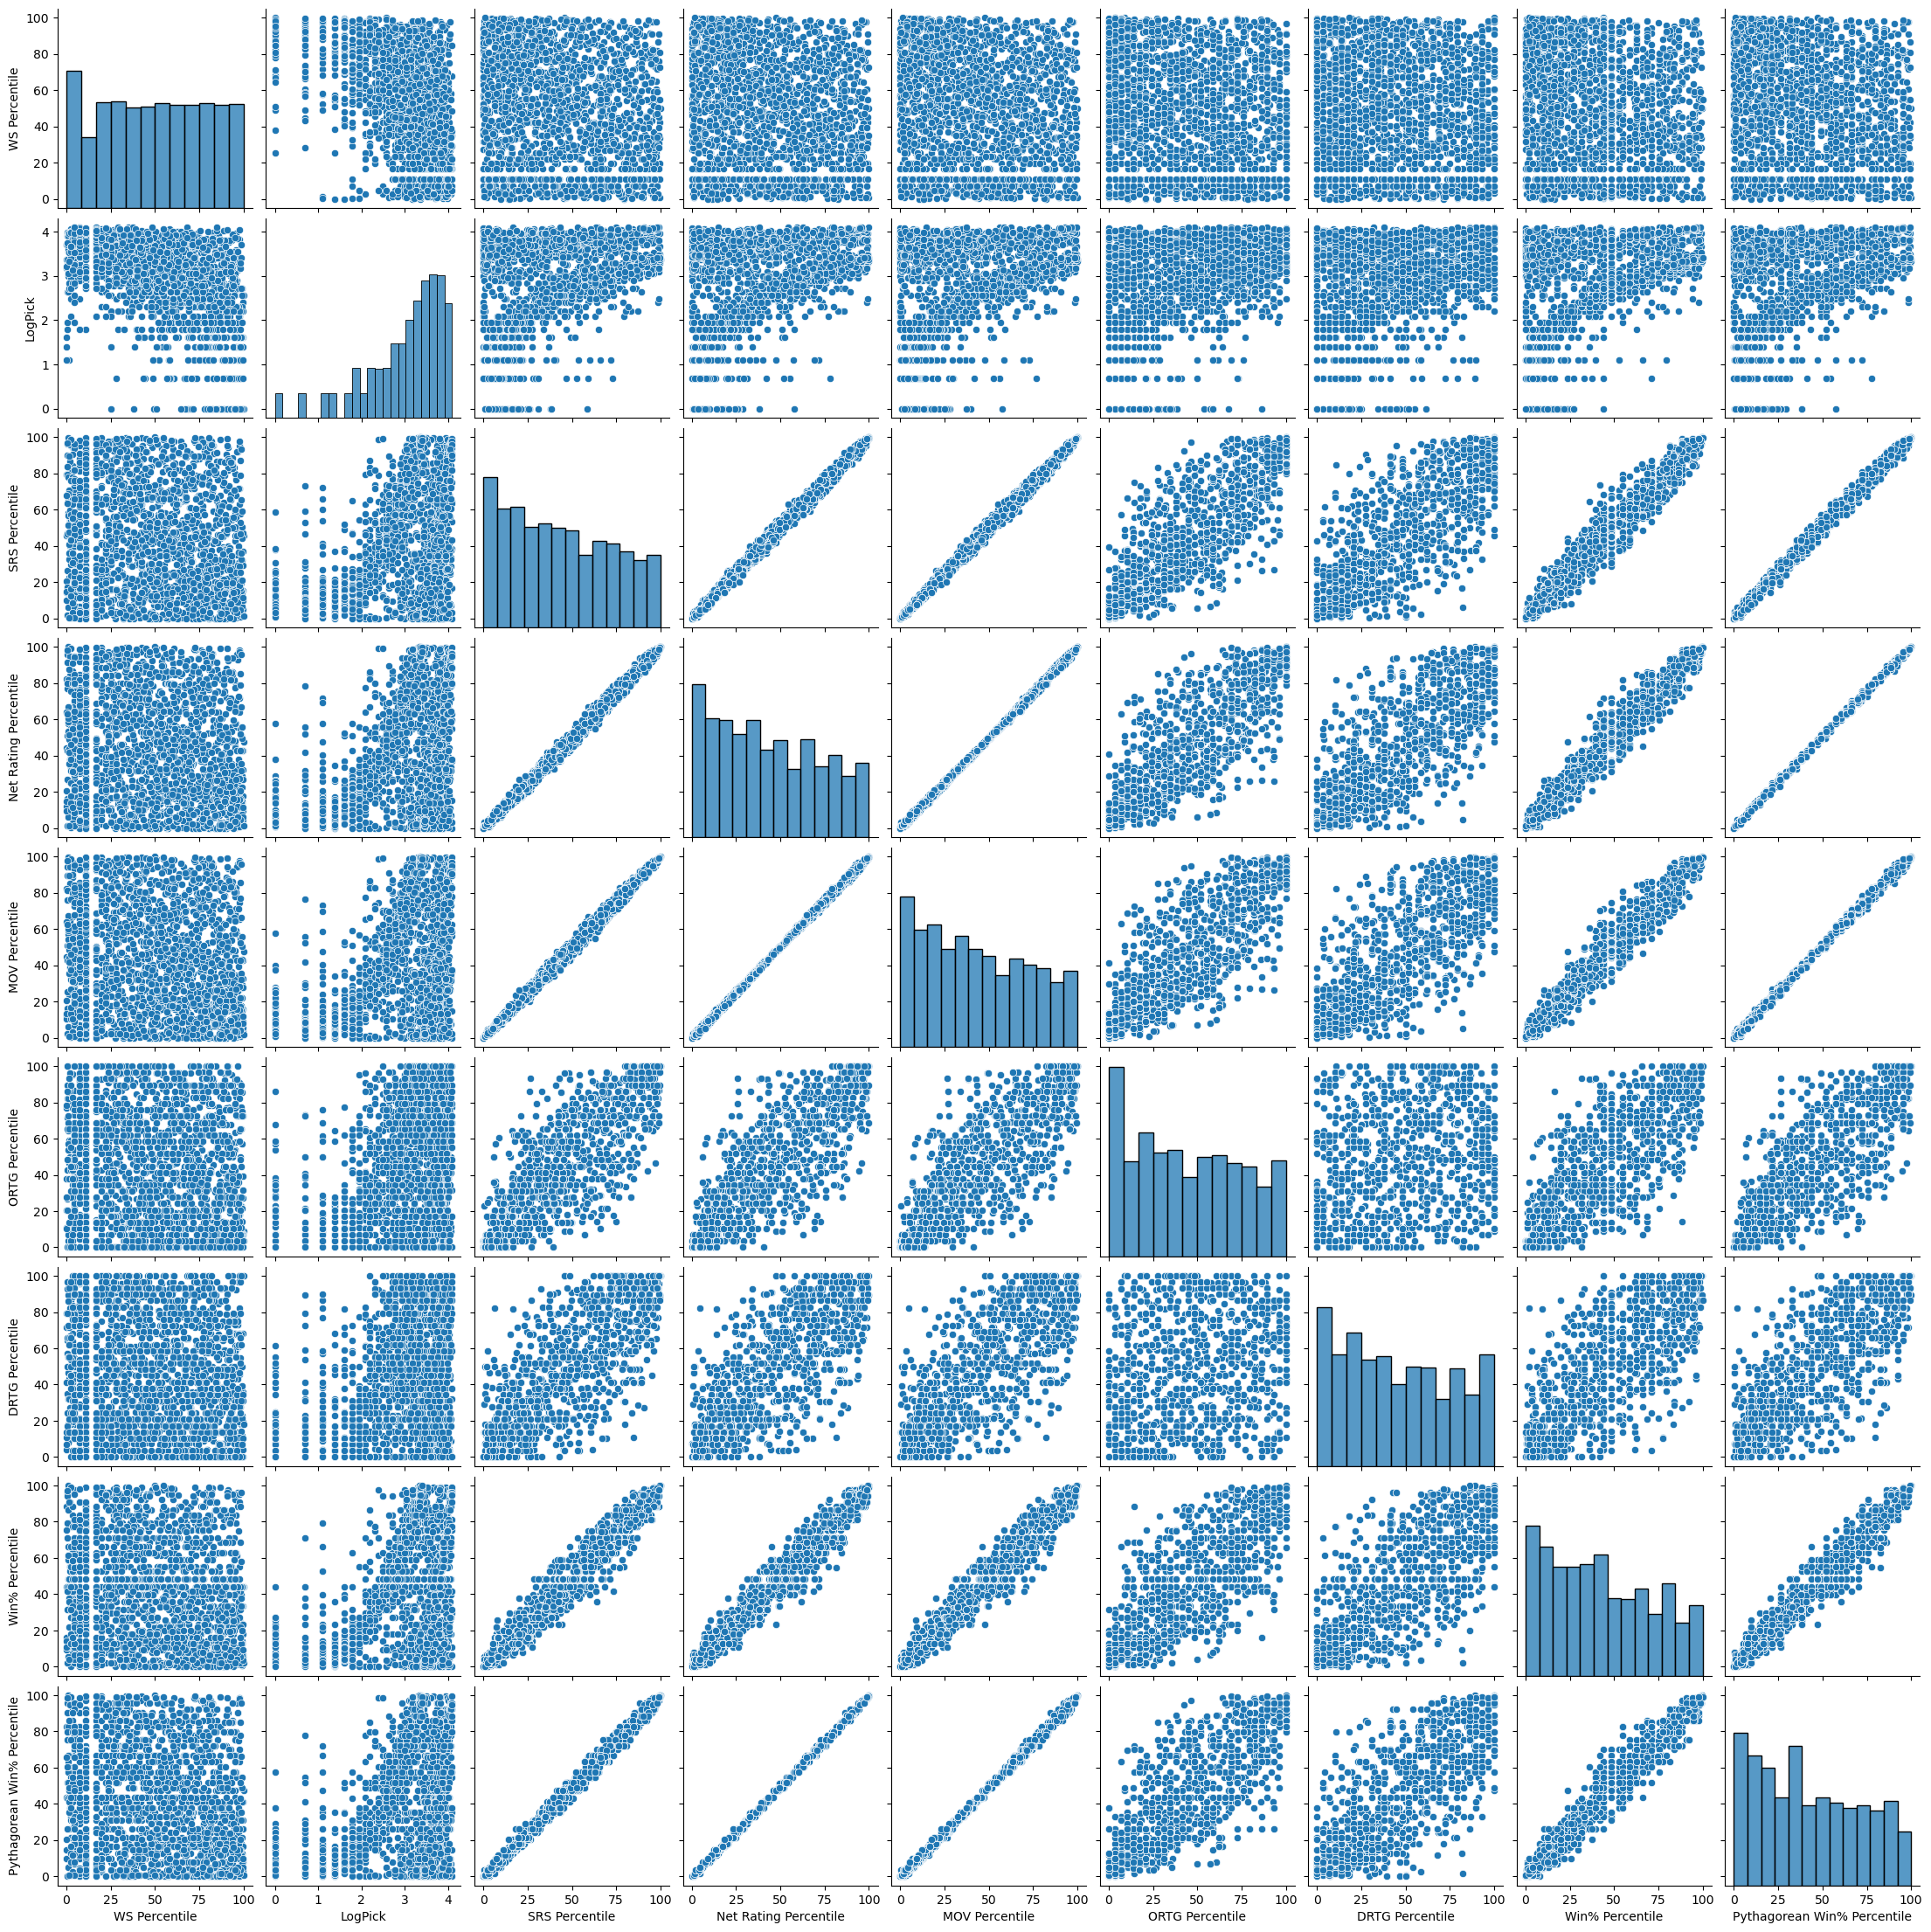

In [314]:
plot_df = nba_df[['WS Percentile', 'LogPick', 'SRS Percentile', 'Net Rating Percentile',
                  'MOV Percentile', 'ORTG Percentile', 'DRTG Percentile',
                  'Win% Percentile', 'Pythagorean Win% Percentile']]


sns.pairplot(plot_df)
plt.show()

In [320]:
nba_df[nba_df['Player_Quality_Raw_WS'] < 0]

,Pick,Draft Year,Team (Full Name),Team And Draft Year,Team Abbr.,Player,College,Years Played,Games Played,Minutes Played,...,Team_Quality_Offense,Team_Quality_Defense,Team_Quality_WP,Team_Quality_Pyth_WP,Player_Quality_VORP_Percentile,Player_Quality_WS_Percentile,Player_Quality_Raw_WS,Player_Quality_Raw_VORP,LogPick,InvPick
11,12,1985,Washington Bullets,Washington Bullets: 1985,WSB,Kenny Green,Wake Forest,2,60,625,...,13.6,91.0,41.8,43.6,15.0,3.4,-0.3,-0.8,0.910235,0.083333
13,14,1985,San Antonio Spurs,San Antonio Spurs: 1985,SAS,Alfredrick Hughes,Loyola Chicago,1,68,866,...,68.1,27.3,44.0,51.9,15.0,2.1,-0.5,-0.8,0.970422,0.071429
26,27,1985,Indiana Pacers,Indiana Pacers: 1985,IND,Dwayne McClain,Villanova,1,45,461,...,0.0,41.0,8.0,12.9,31.8,3.4,-0.3,-0.2,1.192660,0.037037
28,29,1985,San Antonio Spurs,San Antonio Spurs: 1985,SAS,Mike Brittain,South Carolina,2,38,248,...,68.1,27.3,44.0,51.9,24.4,7.3,-0.1,-0.4,1.214110,0.034483
30,32,1985,Phoenix Suns,Phoenix Suns: 1985,PHO,Nick Vanos,Santa Clara,2,68,842,...,18.1,77.3,33.3,31.1,16.9,7.3,-0.1,-0.7,1.242925,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1783,34,2020,Philadelphia 76ers,Philadelphia 76ers: 2020,PHI,Theo Maledon,NaN,4,177,3753,...,58.6,75.9,68.6,65.8,4.2,4.5,-0.2,-2.4,1.260266,0.029412
1788,39,2020,New Orleans Pelicans,New Orleans Pelicans: 2020,NOP,Elijah Hughes,Syracuse,2,54,498,...,44.8,38.0,31.5,37.7,21.7,2.5,-0.4,-0.5,1.298436,0.025641
1789,40,2020,Memphis Grizzlies,Memphis Grizzlies: 2020,MEM,Robert Woodard II,Mississippi State,2,25,87,...,34.4,51.8,39.3,40.8,37.7,7.3,-0.1,-0.1,1.305323,0.025000
1792,43,2020,Sacramento Kings,Sacramento Kings: 2020,SAC,Jahmi'us Ramsey,Texas Tech,3,39,349,...,41.3,34.5,33.2,32.8,27.4,7.3,-0.1,-0.3,1.324738,0.023256


In [219]:
#Contrary to what I thought, though at least some team quality stats did matter,
#team quality stats like SRS didn't have a significant effect, even though it's the best of the stats shown,
#as it's net rating (point differential normalized to 100 possessions), while accounting for strength of schedule
#this is in spite of the fact that net rating itself (which typically has very similar values to SRS) 
#was among the strongest controls

#It makes sense that only one of the team quality metrics (differential based) among net rating,
#margin of victory, and SRS would work, as they're all so similar

#ultimately, offensive and defensive rating in isolation did not have a significant effect, 
#while it seemed like one could, strong defensive teams may not have a high tolerance for a player with weak defense
#like many rookies, and strong offenses may not have much space in the rotation, however, in practice, neither was particularly important

#something which unsurprisingly had by far the largest effect was pick number, higher picks were clearly more valuable

